In [1]:
import datetime
import pandas as pd
import os
import arcpy
import numpy as np
import matplotlib.pyplot as plt
import calendar
import time

pd.reset_option('display.float_format')

In [2]:
# this was going to be used for a date function but we decided not to use it
# def getDateRangeFromWeek(p_year,p_week):
#     firstdayofweek = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
#     lastdayofweek = firstdayofweek + datetime.timedelta(days=6.9)
#     return firstdayofweek

In [3]:
#import table using relative path and create dataframe
btsutah = ".\\utah_allcounties.csv"
df = pd.read_csv(btsutah)
df.head()

,Unnamed: 0,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
0,2778,County,2020-07-06,49,UT,49001.0,Beaver County,1667.0,4913.0,20121.0,7196.0,4952.0,1045.0,1173.0,1656.0,2174.0,1241.0,578.0,85.0,21.0
1,2779,County,2020-07-06,49,UT,49003.0,Box Elder County,12944.0,42006.0,153413.0,38087.0,31969.0,13760.0,12954.0,28662.0,13907.0,8923.0,3815.0,959.0,377.0
2,2780,County,2020-07-06,49,UT,49005.0,Cache County,31376.0,95692.0,353378.0,88692.0,93047.0,39008.0,48054.0,46512.0,16936.0,13197.0,5296.0,2073.0,563.0
3,2781,County,2020-07-06,49,UT,49007.0,Carbon County,4990.0,15279.0,68015.0,15912.0,22899.0,3576.0,8174.0,7414.0,5583.0,3094.0,1130.0,208.0,25.0
4,2782,County,2020-07-06,49,UT,49009.0,Daggett County,335.0,645.0,2084.0,392.0,429.0,137.0,475.0,417.0,106.0,113.0,15.0,0.0,0.0


In [4]:
# add columns and convert date to different date formats - week number, month, etc
df["date"] = df["date"].astype('datetime64[ns]')
df["weeknumber"] = df["date"].apply(lambda x: x.isocalendar()[1])
df["month"] = df["date"].apply(lambda x: x.month)
df["monthname"] = df["date"].apply(lambda x: calendar.month_name[x.month])
df["year"] = df["date"].apply(lambda x: x.year)
# add column for total population - to be used for later percentage calc
df["poptotal"] = df["pop_stay_at_home"] + df["pop_not_stay_at_home"]

# for date function that we did not use
#df['firstday'] = pd.to_datetime(np.vectorize(getDateRangeFromWeek)(2020, df['weeknumber']))

# check new columns
df[["date", "weeknumber", "year", "month", "monthname", "poptotal"]]


,date,weeknumber,year,month,monthname,poptotal
0,2020-07-06,28,2020,7,July,6580.0
1,2020-07-06,28,2020,7,July,54950.0
2,2020-07-06,28,2020,7,July,127068.0
3,2020-07-06,28,2020,7,July,20269.0
4,2020-07-06,28,2020,7,July,980.0
...,...,...,...,...,...,...
19045,2020-09-22,39,2020,9,September,3161105.0
19046,2020-09-23,39,2020,9,September,3161105.0
19047,2020-09-24,39,2020,9,September,3161105.0
19048,2020-09-25,39,2020,9,September,3161105.0


In [5]:
# check all column names
df.columns


Index(['Unnamed: 0', 'level', 'date', 'state_fips', 'state_code',
       'county_fips', 'county', 'pop_stay_at_home', 'pop_not_stay_at_home',
       'trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250',
       'trips_250_500', 'trips_500', 'weeknumber', 'month', 'monthname',
       'year', 'poptotal'],
      dtype='object')

In [6]:
# check that all columns have the correct number of values
df["county"].value_counts()

Beaver County        635
Sanpete County       635
San Juan County      635
Utah County          635
Davis County         635
Salt Lake County     635
Wasatch County       635
Morgan County        635
Garfield County      635
Carbon County        635
Juab County          635
Summit County        635
Sevier County        635
Box Elder County     635
Millard County       635
Duchesne County      635
Iron County          635
Cache County         635
Daggett County       635
Uintah County        635
Grand County         635
Kane County          635
Rich County          635
Emery County         635
Tooele County        635
Wayne County         635
Piute County         635
Weber County         635
Washington County    635
Name: county, dtype: int64

In [26]:
# filter data to county of interest
dfslc = df[df["county"]=="Weber County"]
dfslc

,Unnamed: 0,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,...,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,weeknumber,month,monthname,year,poptotal
28,2806,County,2020-07-06,49,UT,49057.0,Weber County,62118.0,194241.0,731046.0,...,41343.0,22605.0,5588.0,2157.0,1241.0,28,7,July,2020,256359.0
57,5948,County,2020-07-07,49,UT,49057.0,Weber County,61846.0,194513.0,764568.0,...,45845.0,21953.0,5779.0,2487.0,1233.0,28,7,July,2020,256359.0
86,9090,County,2020-07-08,49,UT,49057.0,Weber County,62089.0,194270.0,783273.0,...,50107.0,21652.0,6557.0,3377.0,1362.0,28,7,July,2020,256359.0
115,12232,County,2020-07-09,49,UT,49057.0,Weber County,63089.0,193270.0,794807.0,...,42479.0,23157.0,5772.0,2903.0,1343.0,28,7,July,2020,256359.0
144,15374,County,2020-07-10,49,UT,49057.0,Weber County,60848.0,195511.0,791893.0,...,49856.0,23980.0,6889.0,2088.0,1296.0,28,7,July,2020,256359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18926,2014912,County,2020-09-22,49,UT,49057.0,Weber County,65813.0,190546.0,811448.0,...,47420.0,16879.0,5804.0,1800.0,482.0,39,9,September,2020,256359.0
18955,2018042,County,2020-09-23,49,UT,49057.0,Weber County,61812.0,194547.0,888232.0,...,49178.0,17442.0,6557.0,1790.0,269.0,39,9,September,2020,256359.0
18984,2021158,County,2020-09-24,49,UT,49057.0,Weber County,62294.0,194065.0,872055.0,...,45467.0,15819.0,7850.0,1572.0,565.0,39,9,September,2020,256359.0
19013,2024396,County,2020-09-25,49,UT,49057.0,Weber County,61128.0,195231.0,876491.0,...,46836.0,18138.0,9186.0,1731.0,399.0,39,9,September,2020,256359.0


In [8]:
# check number of values
dfslc["year"].value_counts()
dfslc["month"].value_counts()

8     62
7     62
5     62
3     62
1     62
6     60
4     60
2     57
9     56
12    31
10    31
11    30
Name: month, dtype: int64

In [9]:
# aggregate data - sum trips by week
slctripsbyweek_sum = dfslc.groupby(['weeknumber', 'year'], as_index=False)[['trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500']].sum()
slctripsbyweek_sum = slctripsbyweek_sum[(slctripsbyweek_sum['weeknumber']<40) & (slctripsbyweek_sum['weeknumber']>1)]
slctripsbyweek_sum

,weeknumber,year,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
2,2,2019,6451192.0,1551621.0,1734568.0,865080.0,1095438.0,647401.0,342874.0,132605.0,49670.0,18127.0,13808.0
3,2,2020,7192402.0,1940670.0,1917668.0,975316.0,1175490.0,682034.0,333444.0,108960.0,44608.0,10422.0,3790.0
4,3,2019,6703792.0,1639791.0,1741002.0,925134.0,1136107.0,701809.0,362004.0,124736.0,41526.0,18003.0,13680.0
5,3,2020,7207126.0,1905966.0,1923740.0,976744.0,1176503.0,713011.0,334870.0,113634.0,49005.0,10000.0,3653.0
6,4,2019,6989436.0,1764652.0,1869662.0,947124.0,1156630.0,703116.0,350777.0,121793.0,42228.0,20818.0,12636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,37,2020,6829953.0,2592510.0,1623312.0,699294.0,833326.0,559955.0,286497.0,146418.0,59505.0,18826.0,10310.0
74,38,2019,8975665.0,1953747.0,2636652.0,1262786.0,1492019.0,950922.0,480208.0,154965.0,26917.0,9150.0,8299.0
75,38,2020,5549608.0,1310718.0,1458300.0,731479.0,919910.0,598031.0,312866.0,143676.0,52171.0,13283.0,9174.0
76,39,2019,8822351.0,2014534.0,2564495.0,1269732.0,1535302.0,874821.0,392539.0,123199.0,32434.0,8634.0,6661.0


In [10]:
# filter 2019 and 2020 observations and save to variables - then merge into a table with weeknumber
# we did this so we could graph multiple x values - compare 2019 and 2020 trips
weeknumbers = slctripsbyweek_sum[['weeknumber']].drop_duplicates()
df2019 = slctripsbyweek_sum[slctripsbyweek_sum['year'] == 2019]
df2019.columns = ['weeknumber', 'year', 'trips_2019', 'trips_1_2019','trips_1_3_2019', 'trips_3_5_2019', 'trips_5_10_2019',
       'trips_10_25_2019', 'trips_25_50_2019', 'trips_50_100_2019', 'trips_100_250_2019', 'trips_250_500_2019', 'trips_500_2019']
df2020 = slctripsbyweek_sum[slctripsbyweek_sum['year'] == 2020]
df2020.columns = ['weeknumber', 'year', 'trips_2020', 'trips_1_2020','trips_1_3_2020', 'trips_3_5_2020', 'trips_5_10_2020',
       'trips_10_25_2020', 'trips_25_50_2020', 'trips_50_100_2020', 'trips_100_250_2020', 'trips_250_500_2020', 'trips_500_2020']
dfslcpivot = weeknumbers.merge(df2019.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpivot = dfslcpivot.merge(df2020.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpivot

,weeknumber,trips_2019,trips_1_2019,trips_1_3_2019,trips_3_5_2019,trips_5_10_2019,trips_10_25_2019,trips_25_50_2019,trips_50_100_2019,trips_100_250_2019,...,trips_1_2020,trips_1_3_2020,trips_3_5_2020,trips_5_10_2020,trips_10_25_2020,trips_25_50_2020,trips_50_100_2020,trips_100_250_2020,trips_250_500_2020,trips_500_2020
0,2,6451192.0,1551621.0,1734568.0,865080.0,1095438.0,647401.0,342874.0,132605.0,49670.0,...,1940670.0,1917668.0,975316.0,1175490.0,682034.0,333444.0,108960.0,44608.0,10422.0,3790.0
1,3,6703792.0,1639791.0,1741002.0,925134.0,1136107.0,701809.0,362004.0,124736.0,41526.0,...,1905966.0,1923740.0,976744.0,1176503.0,713011.0,334870.0,113634.0,49005.0,10000.0,3653.0
2,4,6989436.0,1764652.0,1869662.0,947124.0,1156630.0,703116.0,350777.0,121793.0,42228.0,...,1869570.0,1890397.0,974886.0,1164521.0,710775.0,343209.0,120840.0,48001.0,9757.0,4197.0
3,5,6932485.0,1756079.0,1855879.0,941709.0,1156989.0,683425.0,342181.0,124442.0,40800.0,...,1840879.0,1914223.0,951372.0,1159203.0,697450.0,344086.0,124797.0,46624.0,14809.0,7814.0
4,6,6978724.0,1761868.0,1814456.0,963417.0,1167472.0,714055.0,358475.0,126785.0,40970.0,...,1755496.0,1849576.0,916298.0,1111688.0,687264.0,342574.0,123157.0,46831.0,18642.0,12248.0
5,7,6854669.0,1698378.0,1772946.0,936569.0,1168013.0,709877.0,358809.0,129693.0,47114.0,...,1771664.0,1876370.0,1032163.0,1278894.0,768275.0,390011.0,157356.0,46523.0,22648.0,14629.0
6,8,6764317.0,1662403.0,1809455.0,933668.0,1140430.0,675263.0,335199.0,123006.0,51517.0,...,1774239.0,1866186.0,977358.0,1180485.0,789733.0,404117.0,154958.0,52882.0,25080.0,15499.0
7,9,6789680.0,1705993.0,1827918.0,911139.0,1106456.0,677673.0,349176.0,122664.0,53217.0,...,1849118.0,1938066.0,1028247.0,1216180.0,790089.0,363905.0,128459.0,49708.0,11824.0,5911.0
8,10,6892982.0,1771014.0,1858514.0,898408.0,1119623.0,682502.0,340411.0,126386.0,59226.0,...,1680441.0,1661108.0,860178.0,1044561.0,690080.0,359535.0,139858.0,65190.0,24569.0,7107.0
9,11,7731913.0,2001174.0,2085136.0,1011008.0,1249837.0,768191.0,384833.0,135519.0,59930.0,...,1598077.0,1496645.0,794117.0,950978.0,652424.0,379691.0,162781.0,58461.0,40139.0,11339.0


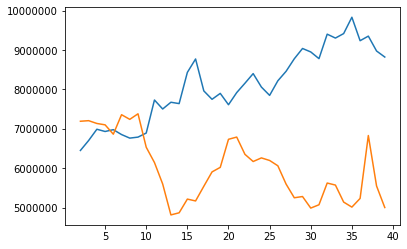

In [11]:
# line graph - did not use for slides
ax, fig1 = plt.subplots()
fig1.plot(dfslcpivot['weeknumber'], dfslcpivot['trips_2019'])
fig1.plot(dfslcpivot['weeknumber'], dfslcpivot['trips_2020'])
fig1.ticklabel_format(style='plain')


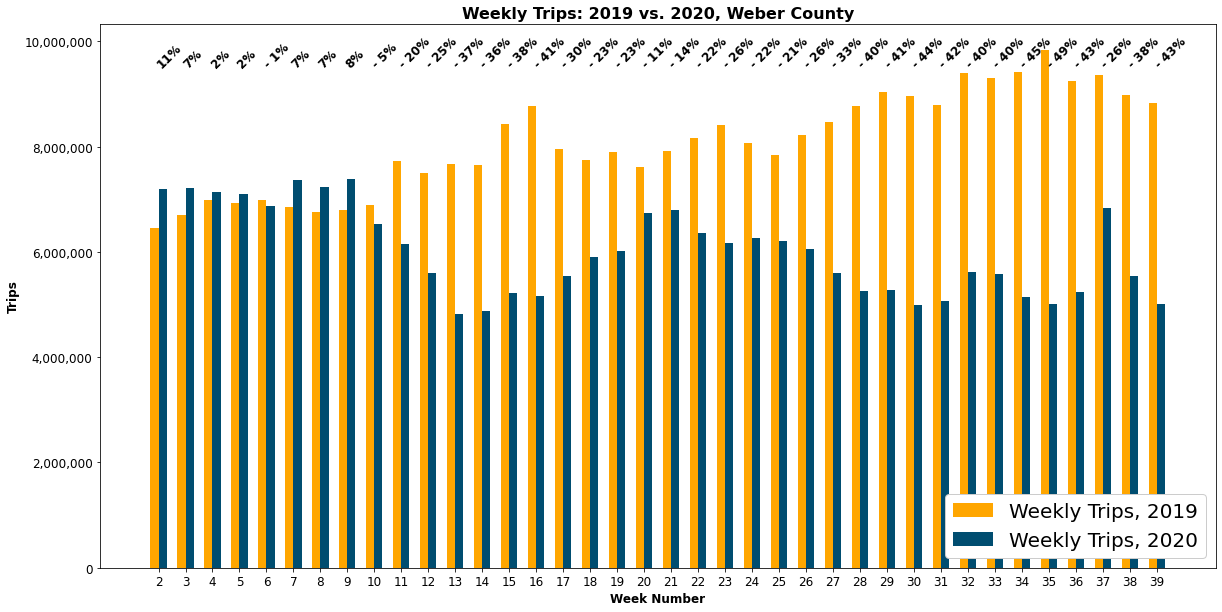

In [30]:
# Bar chart with multiple x's  - weekly trips 2019 vs 2020
plt.rcParams["figure.figsize"]=20,10
n = 38
weektrips19 = dfslcpivot['trips_2019'].to_list()
weektrips20 = dfslcpivot['trips_2020'].to_list()
weeknumbers = dfslcpivot['weeknumber'].to_list()

ind = np.arange(n) 
width = 0.3       
plt.bar(ind, weektrips19, width, label='Weekly Trips, 2019', color='#ffa600')
plt.bar(ind + width, weektrips20, width, label='Weekly Trips, 2020', color='#004d70')


#plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Trips', weight="bold", size=12)
plt.xlabel( 'Week Number', weight="bold", size=12)
plt.title('Weekly Trips: 2019 vs. 2020, Weber County', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((weektrips20[i] - weektrips19[i])/weektrips19[i]) *100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+9500000
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
    
plt.xticks(ind + width / 2, weeknumbers, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize = 20, framealpha=1)
plt.show()

In [13]:
# sum trips by distance values by month
slctripsbymonth_sum = dfslc.groupby(['month', 'year'], as_index=False)[['trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500']].sum()
#slctripsbymonth_sum = slctripsbymonth_sum[(slctripsbyweek_sum['weeknumber']<40) & (slctripsbyweek_sum['weeknumber']>1)]
slctripsbymonth_sum


,month,year,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
0,1,2019,7348783.0,7883960.0,3971401.0,4934738.0,2958379.0,1530138.0,561850.0,202544.0,84642.0,60212.0
1,1,2020,8337185.0,8370926.0,4261617.0,5133170.0,3054564.0,1489062.0,504644.0,208341.0,47167.0,19493.0
2,2,2019,6877892.0,7258849.0,3774017.0,4606860.0,2777955.0,1398950.0,500806.0,185877.0,80096.0,50174.0
3,2,2020,7409384.0,7837313.0,4087738.0,4955230.0,3136133.0,1543352.0,586984.0,202411.0,81667.0,50501.0
4,3,2019,8144901.0,9062126.0,4329343.0,5276354.0,3275981.0,1544185.0,569855.0,293447.0,98390.0,63054.0
5,3,2020,6892152.0,6219639.0,3248694.0,3947714.0,2676430.0,1383627.0,555971.0,242333.0,115010.0,33152.0
6,4,2019,8387487.0,10269803.0,4939280.0,5683084.0,3342819.0,1397312.0,511624.0,366165.0,72026.0,38289.0
7,4,2020,6854796.0,5844257.0,2780821.0,3310038.0,2289057.0,1077352.0,414195.0,194042.0,49126.0,15694.0
8,5,2019,8256410.0,10304739.0,4913485.0,5727922.0,3296532.0,1505492.0,491692.0,242626.0,57601.0,55712.0
9,5,2020,8175450.0,7425654.0,3629533.0,4265740.0,2745918.0,1254561.0,536669.0,274760.0,58003.0,15869.0


In [14]:
# test .loc function, drop first two columns
slctripsbymonth_sum.loc[16, :].values.tolist()[2:]

[8908232.0,
 11561733.0,
 5445619.0,
 6513950.0,
 3886439.0,
 1756336.0,
 564519.0,
 174771.0,
 44962.0,
 37642.0]

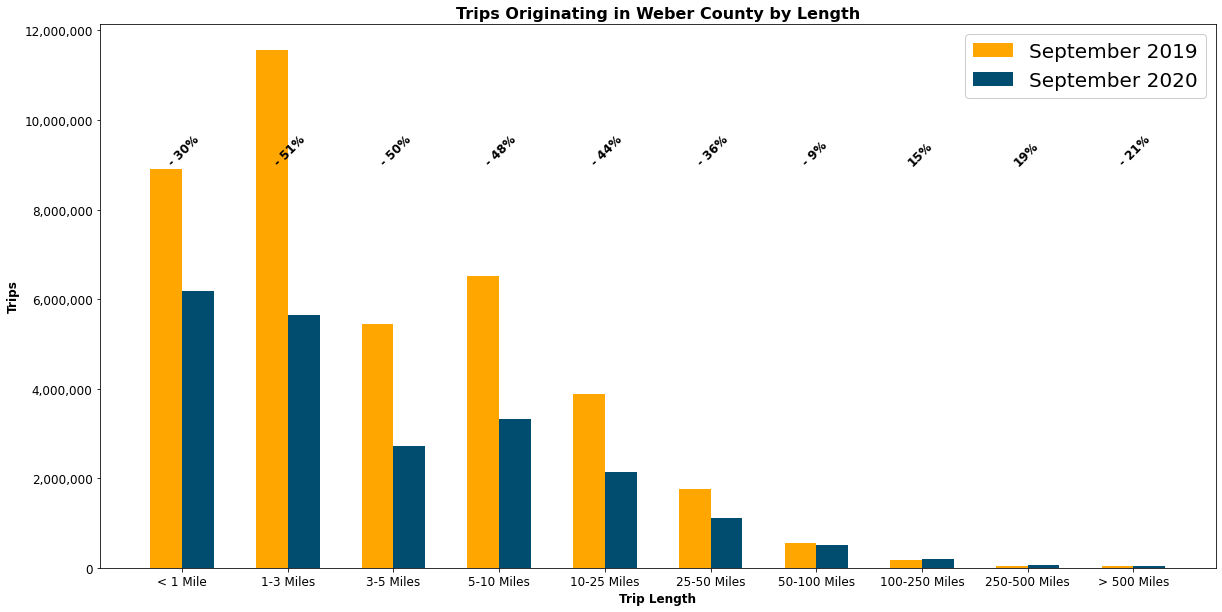

In [34]:
# bar chart - plot trips by distance for the month of septmeber for 2019 and 2020
plt.rcParams["figure.figsize"]=20,10
n = 10
monthtrips19 = slctripsbymonth_sum.loc[16, :].values.tolist()[2:]
monthtrips20 = slctripsbymonth_sum.loc[17, :].values.tolist()[2:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '100-250 Miles', '250-500 Miles', '> 500 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='September 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='September 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Trips', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Weber County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+9000000
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

In [16]:
# pop staying at home
# sum poptotal and popstayathome values by week
# filter down to weeks 2 - 39
# add new column and calculate percent
slcpcnthome_sum = dfslc.groupby(['weeknumber', 'year'], as_index=False)[['poptotal', 'pop_stay_at_home']].sum()
slcpcnthome_sum = slcpcnthome_sum[(slcpcnthome_sum['weeknumber']<40)& (slcpcnthome_sum['weeknumber']>1)]
slcpcnthome_sum["pcntstayhome"] = (slcpcnthome_sum["pop_stay_at_home"]/slcpcnthome_sum["poptotal"])*100
slcpcnthome_sum

,weeknumber,year,poptotal,pop_stay_at_home,pcntstayhome
2,2,2019,1789025.0,350684.0,19.601962
3,2,2020,1794513.0,390216.0,21.744953
4,3,2019,1789025.0,342257.0,19.130923
5,3,2020,1794513.0,381904.0,21.281763
6,4,2019,1789025.0,347017.0,19.396990
...,...,...,...,...,...
73,37,2020,1794513.0,498769.0,27.794115
74,38,2019,1789025.0,339569.0,18.980674
75,38,2020,1794513.0,483270.0,26.930426
76,39,2019,1789025.0,358110.0,20.017048


In [17]:
# filter 2019 and 2020 observations and save to variables - then merge into a table with weeknumber
# we did this so we could graph multiple x values - compare 2019 and 2020 population
weeknumbers = slcpcnthome_sum[['weeknumber']].drop_duplicates()
dfpop2019 = slcpcnthome_sum[slcpcnthome_sum['year']==2019]
dfpop2019.columns = ['weeknumber', 'year', 'poptotal2019', 'pop_stay_at_home_2019', 'pcntstayhome2019']
dfpop2020 = slcpcnthome_sum[slcpcnthome_sum['year']==2020]
dfpop2020.columns = ['weeknumber', 'year', 'poptotal2020', 'pop_stay_at_home_2020', 'pcntstayhome2020']
dfslcpoppivot = weeknumbers.merge(dfpop2019.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpoppivot = dfslcpoppivot.merge(dfpop2020.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpoppivot

,weeknumber,poptotal2019,pop_stay_at_home_2019,pcntstayhome2019,poptotal2020,pop_stay_at_home_2020,pcntstayhome2020
0,2,1789025.0,350684.0,19.601962,1794513.0,390216.0,21.744953
1,3,1789025.0,342257.0,19.130923,1794513.0,381904.0,21.281763
2,4,1789025.0,347017.0,19.396990,1794513.0,382980.0,21.341723
3,5,1789025.0,342315.0,19.134165,1794513.0,367655.0,20.487731
4,6,1789025.0,342125.0,19.123545,1794513.0,371867.0,20.722447
5,7,1789025.0,341339.0,19.079610,1794513.0,337773.0,18.822544
6,8,1789025.0,358976.0,20.065455,1794513.0,370402.0,20.640809
7,9,1789025.0,360486.0,20.149858,1794513.0,362730.0,20.213283
8,10,1789025.0,363925.0,20.342086,1794513.0,359169.0,20.014845
9,11,1789025.0,352046.0,19.678093,1794513.0,378106.0,21.070118


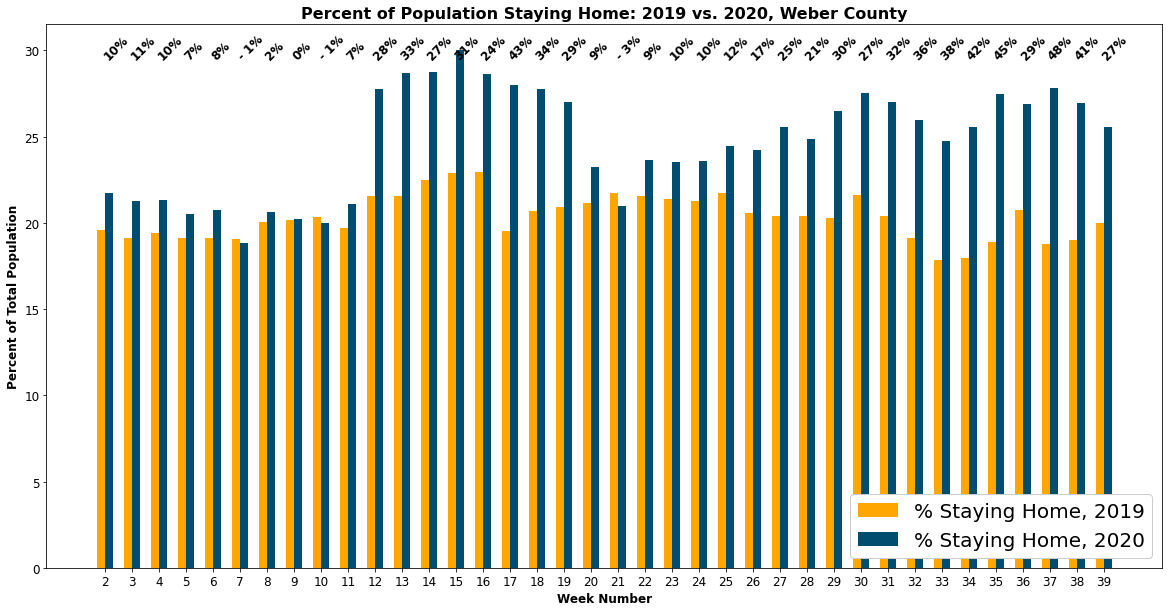

In [22]:
# bar chart - multiple x's 
plt.rcParams["figure.figsize"]=20,10
n = 38
pcntstayhome2019 = dfslcpoppivot['pcntstayhome2019'].to_list()
pcntstayhome2020 = dfslcpoppivot['pcntstayhome2020'].to_list()
weeknumbers = dfslcpoppivot['weeknumber'].to_list()

ind = np.arange(n) 
width = 0.3       
plt.bar(ind, pcntstayhome2019, width, label='% Staying Home, 2019', color='#ffa600')
plt.bar(ind + width, pcntstayhome2020, width, label='% Staying Home, 2020', color='#004d70')

#plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Population', weight="bold", size=12)
plt.xlabel('Week Number', weight="bold", size=12)
plt.title('Percent of Population Staying Home: 2019 vs. 2020, Weber County', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((pcntstayhome2020[i] - pcntstayhome2019[i])/pcntstayhome2019[i])*100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+29.5
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
    
plt.xticks(ind + width / 2, weeknumbers, size=12)
plt.yticks(size=12)
plt.legend(loc='lower right', fontsize=20, framealpha=1)
plt.show()
#plt.savefig(".\\saltlake_pcntpopstayinghome.png")